In [19]:
from data import get_data
from neural_network import NeuralNetwork
from randomforest.randomForestInterface import RandomForest
from grad_boosting_interface import *

import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.colors as mcolors


In [20]:
train_X, train_y, val_X, val_y, test_X, test_y = get_data()

Finished training! Time elapsed: 114.36886405944824
i: 0
boosting round: 2
boosting round: 3
boosting round: 4
boosting round: 5
boosting round: 6


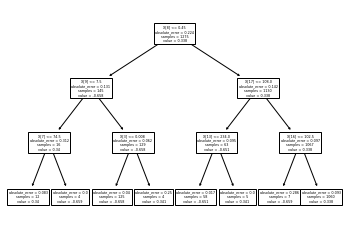

i: 1
boosting round: 2


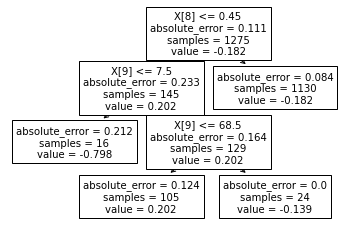

i: 2
boosting round: 2
boosting round: 3
boosting round: 4
boosting round: 5


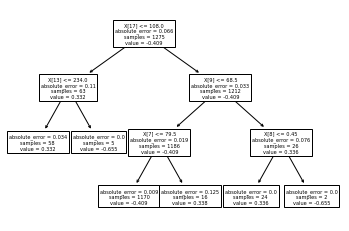

In [22]:
models = [NeuralNetwork(), RandomForest(), Grad_Boosting_Interface()]
modelNames = ["Neural Network", "Random Forest", "Gradient Boosting"]
for model in models:
    model.train(train_X, train_y, val_X, val_y)


In [23]:
predictions = []
outputs = []
confusion_matrices = []
accuracies = []
recalls = []
precisions = []
f1s = []
for i in range(len(models)):
    output = models[i].predict(test_X)
    #print(output)
    
    pred = np.argmax(output, axis=1)
    #print(pred)
    
    predictions.append(pred)
    accuracies.append(accuracy_score(test_y, pred))
    confusion_matrices.append(confusion_matrix(test_y, pred))
    precisions.append(precision_score(test_y, pred, average=None))
    recalls.append(recall_score(test_y, pred, average=None))
    f1s.append(f1_score(test_y, pred, average=None))
    outputs.append(output)


In [24]:
print("Accuracies:")
for i in range(len(models)):
  print(f"{modelNames[i]} has an accuracy of {accuracies[i]}")


Accuracies:
Neural Network has an accuracy of 0.8849765258215962
Random Forest has an accuracy of 0.852112676056338
Gradient Boosting has an accuracy of 0.8943661971830986


In [25]:
print("F1 Scores:")
for i in range(len(models)):
  print(f"{modelNames[i]} has an F1 score of {f1s[i]}.")


F1 Scores:
Neural Network has an F1 score of [0.93740902 0.59574468 0.76056338].
Random Forest has an F1 score of [0.93294461 0.5        0.55172414].
Gradient Boosting has an F1 score of [0.93759071 0.57471264 0.86842105].


In [26]:
print("Precisions:")
for i in range(len(models)):
  print(f"{modelNames[i]} has a precision score of {precisions[i]}.")


Precisions:
Neural Network has a precision score of [0.90449438 0.75675676 0.81818182].
Random Forest has a precision score of [0.90140845 0.52941176 0.8       ].
Gradient Boosting has a precision score of [0.90223464 0.83333333 0.86842105].


In [27]:
print("Recalls:")
for i in range(len(models)):
  print(f"{modelNames[i]} has a recall score of {recalls[i]}.")


Recalls:
Neural Network has a recall score of [0.97280967 0.49122807 0.71052632].
Random Forest has a recall score of [0.96676737 0.47368421 0.42105263].
Gradient Boosting has a recall score of [0.97583082 0.43859649 0.86842105].


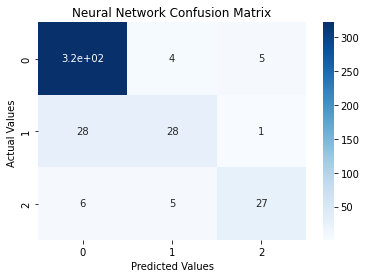

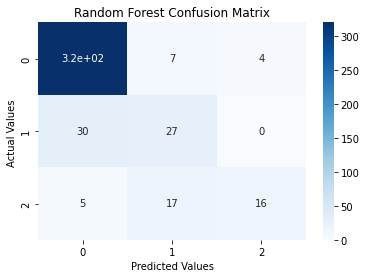

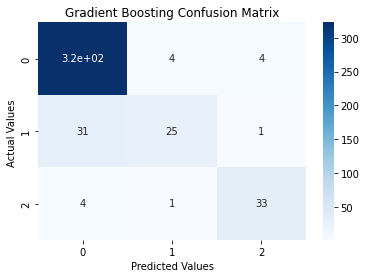

In [28]:
for i in range(len(models)):

  ax = sn.heatmap(confusion_matrices[i], annot=True, cmap='Blues')
  ax.set_title(f'{modelNames[i]} Confusion Matrix')
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ')
  ax.xaxis.set_ticklabels([0, 1, 2])
  ax.yaxis.set_ticklabels([0, 1, 2])
  plt.show()

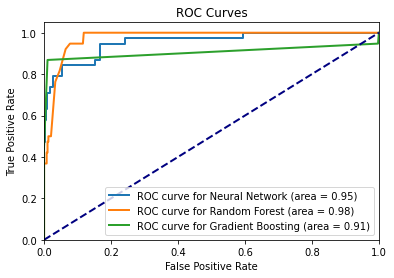

In [29]:
# Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
n_values = np.max(test_y) + 1
test_onehot = np.eye(n_values)[test_y]
plt.figure()
for idx, output in enumerate(outputs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_values):
        fpr[i], tpr[i], _ = roc_curve(test_onehot[:, i], output[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(
        test_onehot.ravel(), outputs[0].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    lw = 2
    plt.plot(
        fpr[2],
        tpr[2],
        color=list(mcolors.TABLEAU_COLORS.values())[idx],
        lw=lw,
        label=f"ROC curve for {modelNames[idx]} (area = {roc_auc[2]:0.2f})",
    )

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()